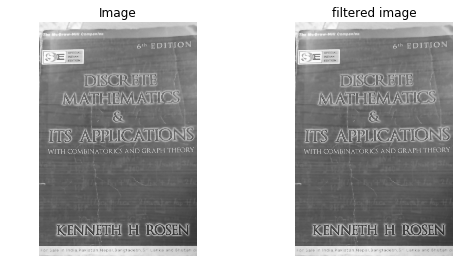

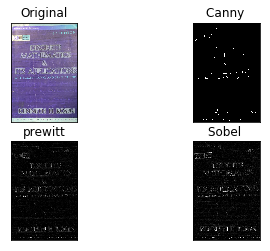

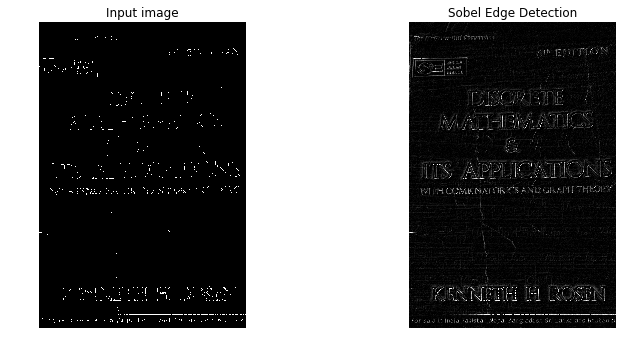

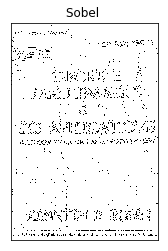

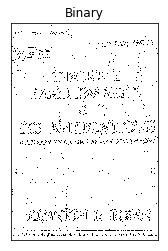

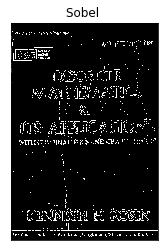

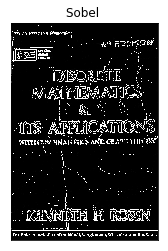

True

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# Read Image

img = cv2.imread('test.png')

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
cv2.imwrite("Images/Denoising_1_copyTest.jpg", rgb_dst)



# Sharping Image
#imgIn = cv2.imread("Image/Denoising_1_copyTest.jpg", cv2.IMREAD_GRAYSCALE)

# Create the identity filter, but with the 1 shifted to the right!
#kernel = np.zeros( (9,9), np.float32)

#Identity, times two! 
#kernel[4,4] = 2.0   

# Create a box filter:
#boxFilter = np.ones( (9,9), np.float32) / 81.0

# Subtract the two:
#kernel = kernel - boxFilter

#sharp_1 = cv2.filter2D(imgIn, -1, kernel)

#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#im = cv2.filter2D(imgIn, -1, kernel)

# save Result 
#cv2.imwrite("Images/sharp_1_copy.jpg", im)



# Geomatric mean Filter
img_geoMean = cv2.imread('Images/Denoising_1_copyTest.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = img_geoMean.shape[:2]
ksize = 5 

padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img_geoMean, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        geomean[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
geomean = np.uint8(geomean)


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(geomean, cmap=plt.cm.gray)
ax[0].set_title('Image')

ax[1].imshow(geomean, cmap=plt.cm.gray)
ax[1].set_title('filtered image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite("Images/filter_1_copyTest.jpg", geomean)




# Edge Detection

img_edge = cv2.imread('Images/filter_1_copyTest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

            #canny
img_canny = cv2.Canny(img_gaussian,90,210)

            #sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely


            #prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewitty + img_prewittx


plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny '), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 5))

ax[0].imshow(img_canny, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(img_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite("Images/SobelEdgeDetectionTest_copyTest.jpg", img_sobel)






# Adaptive Mean thresholding

im_at_mean = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
plt.subplot(1,1,1),plt.imshow(im_at_mean,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()


# Adaptive Thresholding with gaussian weighted average
im_at_gauss = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,7)


plt.subplot(1,1,1),plt.imshow(im_at_gauss,cmap = 'gray')
plt.title('Binary'), plt.xticks([]), plt.yticks([])
plt.show()


# Fixed thresholding
retval, im_at_fixed = cv2.threshold(img_sobel, 40, 255, cv2.THRESH_BINARY)

plt.subplot(1,1,1),plt.imshow(im_at_fixed,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Images/im_at_fixed_copyTest.jpg",im_at_fixed)


# Dilation
img_diln = cv2.imread("Images/im_at_fixed_copyTest.jpg", cv2.IMREAD_GRAYSCALE)

kernel_dilation = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img_diln,kernel_dilation,iterations = 1)

plt.subplot(1,1,1),plt.imshow(dilation,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Images/im_at_Morph_copyTest.jpg",dilation)

In [6]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os


text = pytesseract.image_to_string(Image.open("Images/im_at_Morph_copy.jpg"))
#os.remove()
print(text)

————

THE SUNDAY mms TOP TEN BESTSELLER g!

Yuval Noah Haraﬂ

 

E115 rory Of
Hum ankin Cl,

1-! RARE BOOK...THR1]JJNG AND BRL-i'I'J-ITAKING’
OBSH‘HER

HBVJNM


In [1]:
import pytesseract

In [2]:
import tesserocr

In [5]:
import tesserocr
from PIL import Image

print(tesserocr.tesseract_version()) # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

image = Image.open('one.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image
# or
#print(tesserocr.file_to_text('one.jpg'))

tesseract 4.0.0
 leptonica-1.76.0 (Oct 18 2018, 22:12:51) [MSC v.1900 LIB Release x64]
  libgif 5.1.4 : libjpeg 9b : libpng 1.6.35 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
('c:\\users\\naagar\\anaconda3\\envs\\opencv-env\\/tessdata/', ['eng', 'osd'])
   
  
  

DIGITAL
IMAGE
PROCESSING

 

weeaaMnnnmnurmoammmumumwyh

Indtal Bangladesh. Bhutan. Pm. NOW. 36 L8“ and In W.
Cuwlaﬂon 01 this edition out“ of m m 6| WW.



In [7]:
import tesserocr
from PIL import Image

print(tesserocr.tesseract_version()) # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

image = Image.open('Images/im_at_Morph_copy.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image
# or
#print(tesserocr.file_to_text('one.jpg'))

tesseract 4.0.0
 leptonica-1.76.0 (Oct 18 2018, 22:12:51) [MSC v.1900 LIB Release x64]
  libgif 5.1.4 : libjpeg 9b : libpng 1.6.35 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
('c:\\users\\naagar\\anaconda3\\envs\\opencv-env\\/tessdata/', ['eng', 'osd'])
F—_

Swims

THE SUNDAY TIMES TOP TEN BESTSELLER

Yuval Noah Haraﬂ

1%,.-
zit-1:.

- -. -_-—

. ._ ____..

.j/I. .1;

1-,- ‘_--.~,_ 731.. ._

:5: ""'.L-'_' R I _

_- 3:. .;--.a-_ .

 

A Busf
Higmry of
Hum. ankin d

1-! RARE BOOK...THR1]_LING AND BRLAH-ITAKING’
OBSHH-R

HBVJNM



In [9]:


import tesserocr
from PIL import Image

print(tesserocr.tesseract_version()) # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

image = Image.open('Images/Denoising_1_copy.jpg')
print("/n",tesserocr.image_to_text(image))  # print ocr text from image
# or
#print(tesserocr.file_to_text('one.jpg'))

tesseract 4.0.0
 leptonica-1.76.0 (Oct 18 2018, 22:12:51) [MSC v.1900 LIB Release x64]
  libgif 5.1.4 : libjpeg 9b : libpng 1.6.35 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
('c:\\users\\naagar\\anaconda3\\envs\\opencv-env\\/tessdata/', ['eng', 'osd'])
/n THE Si VD.” “Ml-‘5 TOP TF\ BESTSELLE-
Yuval Noah Harari

 

C
S ap1ens
A Brief
w History of

  
 

1

0| EEEEEE



In [10]:
import tesserocr
from PIL import Image

print(tesserocr.tesseract_version()) # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

image = Image.open('Images/im_at_fixed_copy.jpg')
print("/n",tesserocr.image_to_text(image))  # print ocr text from image


tesseract 4.0.0
 leptonica-1.76.0 (Oct 18 2018, 22:12:51) [MSC v.1900 LIB Release x64]
  libgif 5.1.4 : libjpeg 9b : libpng 1.6.35 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
('c:\\users\\naagar\\anaconda3\\envs\\opencv-env\\/tessdata/', ['eng', 'osd'])
/n 7—,,

THE SUNDAY TIMES TOP TEN BESTSELLER

Y‘mra‘l Noah Harari

 

Hi§mry Of
H 1:1 m ankin it

1-3 RARE 3003...]‘HRILL1NG AND BREATHTAKLV G’
OBSEREER

EQVMQLA



In [5]:
import tesserocr
from PIL import Image

 # print tesseract-ocr version
  # prints tessdata path and list of available languages

image = Image.open('Images/im_at_fixed_copyTest.jpg')
print(tesserocr.image_to_text(image))  # print ocr text from image


 

gm. - :3 , / .. ‘f\\x-\.\l lr'r-v-ii H/Ii L_z :, » ~, /
, , WITH: @QMBINATQRICSMD mm rt THFQEN

       

For Sale In Jndla,Pakistan,Nepal,Bangladesh,Srl Lanka and Bhutan o


